In [1]:
# Fe de erratas, mas abajo escribi que las columnas pal_sales y other_sales no estaban en el diccionario.
# He visto que estaban filtrada no mas. SI ESTAN.
# Profe, mis fuentes fueron tu videos para tenerl clara.
# chatgpt para corregir mis codigos, estoy muy crudo en esta parte.
# chatgpt para crear codigos en las visualizaciones, no me salian las que tomababa y ya se me pasa la hora.

# Al menos se que estoy haciendo gracias a tus clases y videos: Porfa no lo tomes como una cepillada, es simplemente para dejar claro mis fuentes!
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt


# Agregar la carpeta 'src' al sys.path
sys.path.append(os.path.abspath("../src"))

# Ahora puedes importar utils
from utils import cargar_datos_pd
from utils import ver_resumen_nulos


# Invocar la función cargar_datos
ruta_archivo = '../data/vgchartz-2024.csv'
df_bruto = cargar_datos_pd(ruta_archivo)
df_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [2]:
df_bruto.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [3]:
# Empezamos por datos nulos, veamos el resumen.
print(ver_resumen_nulos(df_bruto))

              datos sin NAs en q  Na en q  Na en %
critic_score                6678    57338    89.57
jp_sales                    6726    57290    89.49
na_sales                   12637    51379    80.26
pal_sales                  12824    51192    79.97
other_sales                15128    48888    76.37
last_update                17879    46137    72.07
total_sales                18922    45094    70.44
release_date               56965     7051    11.01
developer                  63999       17     0.03
publisher                  64016        0     0.00
img                        64016        0     0.00
genre                      64016        0     0.00
console                    64016        0     0.00
title                      64016        0     0.00


In [4]:
#Detección y eliminación de valores duplicados: Son 3 nada mas. Originalmente RangeIndex: 64016 entries, 0 to 64015
# Ver duplicados
df_bruto[df_bruto.duplicated(subset=['img','title','console','genre','publisher','developer'])]

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
36183,/games/boxart/default.jpg,MonsterCrafter,And,Misc,Naquatic LLC,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-04,NaN
36844,/games/boxart/default.jpg,Plants vs. Zombies,OSX,Misc,PopCap Games,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-05,NaN
39129,/games/boxart/default.jpg,Written Legends: Nightmare at Sea,OSX,Misc,Big Fish Games,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,2013-02-04,NaN


In [5]:
# Eliminamos los duplicados. Defino las primeras columnas como registros unicos, incluyendo la imagen.
(df_bruto[df_bruto.duplicated(subset=['img','title','console','genre','publisher','developer'])]).index# Referencia chatgpt para determinar columnas claves.
# Obtengo los indices de los duplicados.
idx_noduplicados = ((df_bruto[df_bruto.duplicated(subset=['img','title','console','genre','publisher','developer'])]).index)

In [6]:

print(idx_noduplicados)
print(df_bruto.iloc[36183])
# Creo un nuevo df sin dichos registros.
df_sin_duplicados = df_bruto[(~(df_bruto.index.isin(idx_noduplicados)))]



Index([36183, 36844, 39129], dtype='int64')
img             /games/boxart/default.jpg
title                      MonsterCrafter
console                               And
genre                                Misc
publisher                    Naquatic LLC
developer                         Unknown
critic_score                          NaN
total_sales                           NaN
na_sales                              NaN
jp_sales                              NaN
pal_sales                             NaN
other_sales                           NaN
release_date                   2013-12-04
last_update                           NaN
Name: 36183, dtype: object


In [7]:
# Originalmente RangeIndex: 64016 entries, 0 to 64015. Se eliminaron 3 duplicados.
df_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64013 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64013 non-null  object 
 1   title         64013 non-null  object 
 2   console       64013 non-null  object 
 3   genre         64013 non-null  object 
 4   publisher     64013 non-null  object 
 5   developer     63996 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56962 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 7.3+ MB


In [ ]:
# Fin Detección y eliminación de valores duplicados

In [ ]:
# NO VAMOS A ELIMINAR los registros con nulos pues dice Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. 
# Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
# en TODAS estas columnas PUES NO LAS USARE EN LAS ESTADISTICAS
# Filtrar los registros que tienen valores nulos en las columnas 'critic_score', 'total_sales','na_sales','jp_sales','pal_sales','other_sales'
#df_nulos = df_sin_duplicados[df_sin_duplicados[['critic_score', 'total_sales','na_sales','jp_sales','pal_sales','other_sales']].isnull().all(axis=1)]
#df_nulos.info()

In [ ]:
# Procedemos a eliminarlos
#df_limpio = df_sin_duplicados[~df_sin_duplicados[['critic_score', 'total_sales','na_sales','jp_sales','pal_sales','other_sales']].isnull().all(axis=1)]
#df_limpio.info()

In [16]:
# Vemos el resumen
#ver_resumen_nulos(df_limpio)


<bound method Series.unique of 0               NaN
1        2018-01-03
2               NaN
3               NaN
4        2018-01-14
            ...    
64011    2019-01-28
64012    2020-05-09
64013    2020-05-09
64014    2019-02-24
64015    2023-09-29
Name: last_update, Length: 64013, dtype: object>

In [13]:
# Todos los datos faltantes vamos a poner cero a los numeros y una fecha principio de siglo.
df_sin_duplicados.loc[df_sin_duplicados['critic_score'].isnull(), 'critic_score'] = 0
df_sin_duplicados.loc[df_sin_duplicados['total_sales'].isnull(), 'total_sales'] = 0
df_sin_duplicados.loc[df_sin_duplicados['na_sales'].isnull(), 'na_sales'] = 0
df_sin_duplicados.loc[df_sin_duplicados['jp_sales'].isnull(), 'jp_sales'] = 0
df_sin_duplicados.loc[df_sin_duplicados['pal_sales'].isnull(), 'pal_sales'] = 0
df_sin_duplicados.loc[df_sin_duplicados['other_sales'].isnull(), 'other_sales'] = 0

In [14]:
ver_resumen_nulos(df_sin_duplicados)

,datos sin NAs en q,Na en q,Na en %
last_update,17879,46134,72.07
release_date,56962,7051,11.01
developer,63996,17,0.03
console,64013,0,0.00
title,64013,0,0.00
img,64013,0,0.00
publisher,64013,0,0.00
genre,64013,0,0.00
critic_score,64013,0,0.00
total_sales,64013,0,0.00


In [17]:
# Las fechas, para tener el formato de principiode siglo. No voy a extrapolar con un dato de estos.
df_sin_duplicados['last_update'].unique

<bound method Series.unique of 0               NaN
1        2018-01-03
2               NaN
3               NaN
4        2018-01-14
            ...    
64011    2019-01-28
64012    2020-05-09
64013    2020-05-09
64014    2019-02-24
64015    2023-09-29
Name: last_update, Length: 64013, dtype: object>

In [18]:
#Asignamos principio de siglo.
df_sin_duplicados.loc[df_sin_duplicados['last_update'].isnull(), 'last_update'] = '1900-01-01'

In [19]:
ver_resumen_nulos(df_sin_duplicados)

,datos sin NAs en q,Na en q,Na en %
release_date,56962,7051,11.01
developer,63996,17,0.03
title,64013,0,0.00
console,64013,0,0.00
genre,64013,0,0.00
img,64013,0,0.00
publisher,64013,0,0.00
critic_score,64013,0,0.00
na_sales,64013,0,0.00
total_sales,64013,0,0.00


In [20]:
# Las fechas, para tener el formato de principiode siglo. No voy a extrapolar con un dato de estos.
df_sin_duplicados['release_date'].unique

<bound method Series.unique of 0        2013-09-17
1        2014-11-18
2        2002-10-28
3        2013-09-17
4        2015-11-06
            ...    
64011    2016-08-11
64012    2020-07-30
64013    2020-07-30
64014    2019-02-28
64015           NaN
Name: release_date, Length: 64013, dtype: object>

In [21]:
#Asignamos principio de siglo.
df_sin_duplicados.loc[df_sin_duplicados['release_date'].isnull(), 'release_date'] = '1900-01-01'

In [22]:
ver_resumen_nulos(df_sin_duplicados)

,datos sin NAs en q,Na en q,Na en %
developer,63996,17,0.03
img,64013,0,0.00
title,64013,0,0.00
console,64013,0,0.00
genre,64013,0,0.00
publisher,64013,0,0.00
critic_score,64013,0,0.00
total_sales,64013,0,0.00
na_sales,64013,0,0.00
jp_sales,64013,0,0.00


In [23]:
# Developer
df_sin_duplicados['developer'].unique


<bound method Series.unique of 0              Rockstar North
1              Rockstar North
2              Rockstar North
3              Rockstar North
4                    Treyarch
                 ...         
64011        Arc System Works
64012    Nippon Ichi Software
64013    Nippon Ichi Software
64014                 Otomate
64015              G.rev Ltd.
Name: developer, Length: 64013, dtype: object>

In [24]:
df_sin_duplicados.loc[df_sin_duplicados['developer'].isnull(), 'developer'] = 'no developer'

In [25]:
ver_resumen_nulos(df_sin_duplicados)

,datos sin NAs en q,Na en q,Na en %
img,64013,0,0.0
title,64013,0,0.0
console,64013,0,0.0
genre,64013,0,0.0
publisher,64013,0,0.0
developer,64013,0,0.0
critic_score,64013,0,0.0
total_sales,64013,0,0.0
na_sales,64013,0,0.0
jp_sales,64013,0,0.0


In [26]:
# Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un videojuego con ventas negativas).
print('minimo critic_score:',df_sin_duplicados['critic_score'].min())
print('minimo total_sales:',df_sin_duplicados['total_sales'].min())
print('minimo na_sales:',df_sin_duplicados['na_sales'].min())
print('minimo jp_sales:',df_sin_duplicados['jp_sales'].min())
print('minimo pal_sales:',df_sin_duplicados['pal_sales'].min())
print('minimo other_sales:',df_sin_duplicados['other_sales'].min())

minimo critic_score: 0.0
minimo total_sales: 0.0
minimo na_sales: 0.0
minimo jp_sales: 0.0
minimo pal_sales: 0.0
minimo other_sales: 0.0


In [27]:


#Verificación y ajuste de tipos de datos.
# Aqui solo me interesan verificar los datos numericos.
""" 
critic_score float rango 1-10
"""
# creamos un df_tipo_dato
df_tipo_dato = df_sin_duplicados.copy()
#Empezamos a controlar las columnas.
columna =  "critic_score"
columna_check = f'{columna}_chk'

def controlar():
    # Chatgpt. Yo lo adapte a mi parecer.
    # Intentar convertir la columna a float
    df_tipo_dato[columna_check] = pd.to_numeric(df_tipo_dato[columna], errors='coerce')
    # Verificar si hay valores que no pudieron ser convertidos a float (NaN)
    no_float_values = df_tipo_dato[df_tipo_dato[columna_check].isnull()]
    if not no_float_values.empty:
        print(f"La columna {columna} contiene valores que no son de tipo float:")
        print(no_float_values[columna])
    else:
        print(f"Todos los valores de la columna {columna}  son convertibles a float.")

#Empezamos con la columna critic_score
columna =  "critic_score"
columna_check = f'{columna}_chk'
controlar()

Todos los valores de la columna critic_score  son convertibles a float.


In [28]:
#Continuamos con la columna total_sales
columna =  "total_sales"
columna_check = f'{columna}_chk'
controlar()

Todos los valores de la columna total_sales  son convertibles a float.


In [29]:
#Continuamos con la columna na_sales
columna =  "na_sales"
columna_check = f'{columna}_chk'
controlar()

Todos los valores de la columna na_sales  son convertibles a float.


In [30]:
#Continuamos con la columna jp_sales
columna =  "jp_sales"
columna_check = f'{columna}_chk'
controlar()

Todos los valores de la columna jp_sales  son convertibles a float.


In [31]:
#Continuamos con la columna pal_sales. Este no está en el diccionario de datos!
columna =  "pal_sales"
columna_check = f'{columna}_chk'
controlar()

Todos los valores de la columna pal_sales  son convertibles a float.


In [32]:
#Continuamos con la columna other_sales. Este tampoco está en el diccionario de datos!
columna =  "other_sales"
columna_check = f'{columna}_chk'
controlar()

Todos los valores de la columna other_sales  son convertibles a float.


In [33]:
# Me llama la atencion que sea float, pues yo normalmente veo que es de 1 al 10 enteros.
# Pero el diccionario detalla que es float y no dice mas nada al respecto por lo que dejo asi no mas.
# Aunque estoy tentado a truncarlo, pero no tengo un elemento que me valide eso. Me falta mas contexto Y TIEMPO!
df_sin_duplicados['critic_score'].unique

<bound method Series.unique of 0        9.4
1        9.7
2        9.6
3        0.0
4        8.1
        ... 
64011    0.0
64012    0.0
64013    0.0
64014    0.0
64015    0.0
Name: critic_score, Length: 64013, dtype: float64>

In [ ]:
# De acuerdo a datos faltantes, en este punto ya no es necesario aplicar esto, pero lo dejo igual como control cuando tenia valores nulos.
# Pues la funcion controlar() registraba una nueva columna para ver cuales no podian convertirse a float.
# Como todas las numericas pasaron bien despues de asignarle cero, no hace falta esto.
# Ver que dato numerico puedo usar para poblar este dato. NO SE PUEDE  pero puedo marcar para ignorarlo en cuanto a evaluación del juego.
#print(df_tipo_dato['critic_score'].min())
#print(df_tipo_dato['critic_score'].max())
# Como el rango es de 1-10, lo dejo en cero.
#df_tipo_dato['critic_score'].fillna(0)
#df_tipo_dato['critic_score'] = df_tipo_dato['critic_score'].fillna(0)
#Eliminamos
#del df_tipo_dato['critic_score_chk']

In [ ]:
# FIN Verificación y ajuste de tipos de datos.

In [35]:
# Veamos el resumen. Se corrigio critic_score y se elimino el auxiliar critic_score_chk
print(ver_resumen_nulos(df_sin_duplicados))

              datos sin NAs en q  Na en q  Na en %
img                        64013        0      0.0
title                      64013        0      0.0
console                    64013        0      0.0
genre                      64013        0      0.0
publisher                  64013        0      0.0
developer                  64013        0      0.0
critic_score               64013        0      0.0
total_sales                64013        0      0.0
na_sales                   64013        0      0.0
jp_sales                   64013        0      0.0
pal_sales                  64013        0      0.0
other_sales                64013        0      0.0
release_date               64013        0      0.0
last_update                64013        0      0.0


In [36]:
# Ya tenemos limpio el dataframe.
df = df_sin_duplicados.copy()

In [37]:
print(df.columns)

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')


TypeError: unhashable type: 'numpy.ndarray'

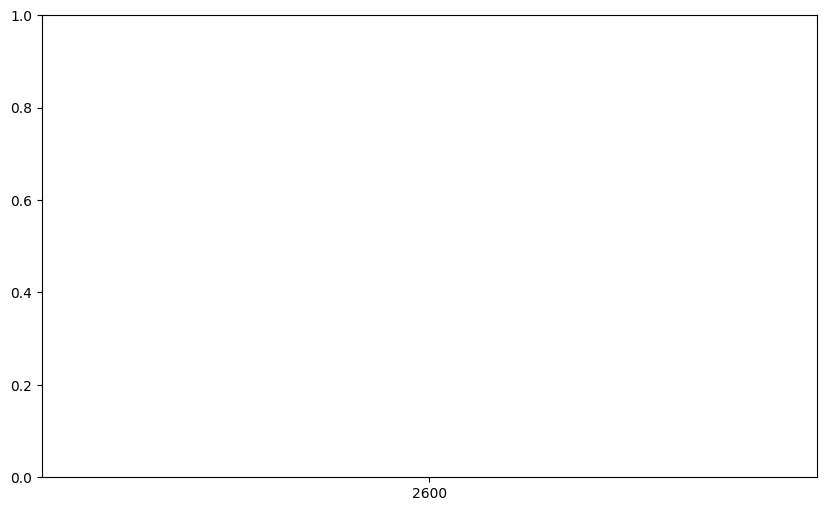

In [47]:
# Este es mi codigo original, no encontre como solo ver los de ciertas consolas, le pase a chatgpt para que me lo corrija, está mas abajo.
# Visualizaciones exploratorias univariadas

# Vamos a agrupar por consola, quiero ve
grouped = df.groupby(['console']) # agrupor por semana
resumen = grouped.agg({'critic_score': 'mean','total_sales': 'mean' ,'na_sales': 'mean', 'jp_sales': 'mean', 'other_sales': 'mean'}).reset_index() #calcular estadísticas
x = resumen['console']
y1 = resumen['na_sales']
y2 = resumen['jp_sales']
y3 = resumen['other_sales']
target = resumen['total_sales']
# Filtrar el resumen para obtener solo los promedios mayores a 0.043336
threshold = 0.043336
resumen_filtrado = resumen[resumen['total_sales'] > threshold]
target = resumen_filtrado['total_sales']
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.bar(x, resumen_filtrado)
plt.title("Gráfico de ventas globales para cada consola")
plt.xlabel("Consolas")
plt.ylabel("Total de Ventas Globales")
plt.show()



In [44]:
resumen['total_sales'].describe()

count    81.000000
mean      0.049000
std       0.101181
min       0.000000
25%       0.000000
50%       0.000000
75%       0.043336
max       0.495556
Name: total_sales, dtype: float64

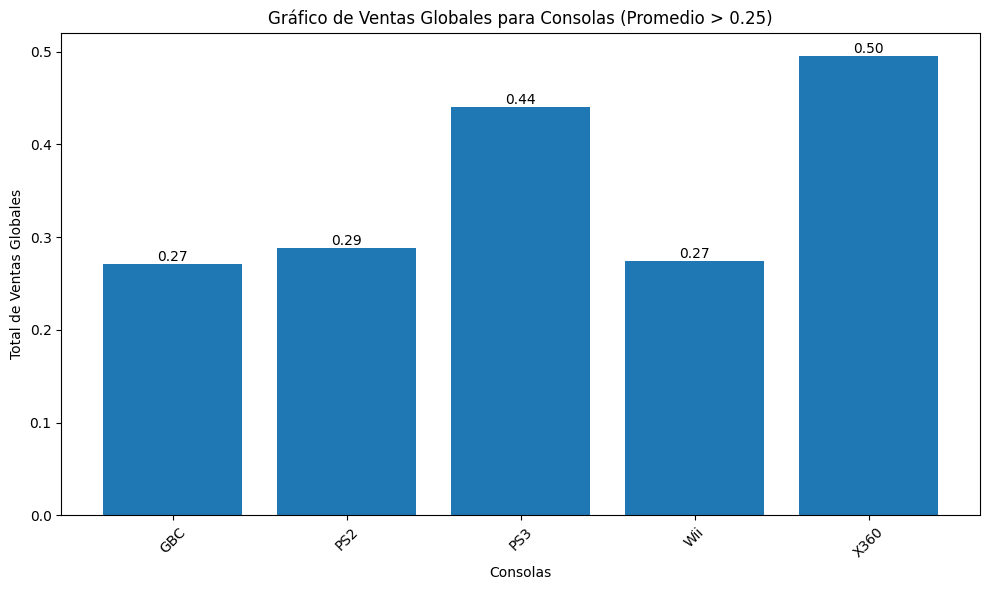

In [52]:
# Quiero ver cuales son las consolas con los 5 mejores promedios de ventas totales.
# Supongamos que 'df' es tu DataFrame ya cargado y contiene las columnas necesarias

# Agrupar por consola y calcular estadísticas
grouped = df.groupby(['console'])
resumen = grouped.agg({
    'critic_score': 'mean',
    'total_sales': 'mean',
    'na_sales': 'mean',
    'jp_sales': 'mean',
    'other_sales': 'mean'
}).reset_index()

# Filtrar el resumen para obtener solo los promedios mayores a 0.043336
threshold = 0.25
resumen_filtrado = resumen[resumen['total_sales'] > threshold]

# Asignar las columnas a variables
x = resumen_filtrado['console']
target = resumen_filtrado['total_sales']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
bars = plt.bar(x, target)

# Personalizar el gráfico
plt.title(f"Gráfico de Ventas Globales para Consolas (Promedio > {threshold})")# Este modifique yo.
plt.xlabel("Consolas")
plt.ylabel("Total de Ventas Globales")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que no se recorten las etiquetas

# Etiquetar las barras filtradas. Esto le pedi a chatgpt
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', ha='center', va='bottom')  # Añadir texto

# Mostrar el gráfico
plt.show()


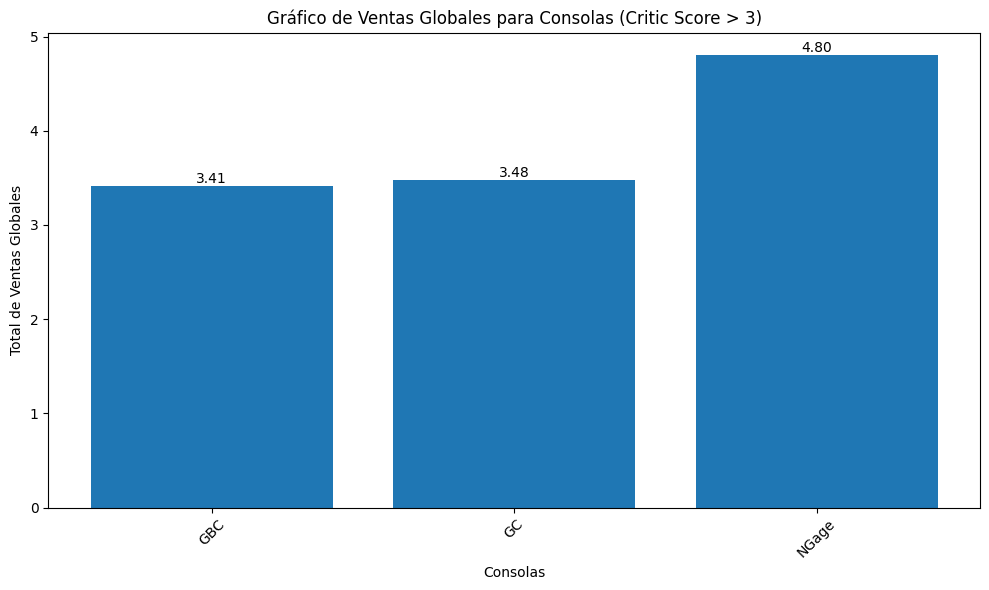

In [59]:
# Quiero ver cuales son las consolas con los 5 mejores promedios de valoracion.
# Creo que la puntuacion es de 1 a 5 Y NO DE 1 A 10. No creo que sean tan malas las experiencias y se sigan comprando!
# Filtrar el resumen para obtener solo los promedios de critic_score mayores a 8
threshold_score = 3
resumen_filtrado = resumen[resumen['critic_score'] > threshold_score]

# Asignar las columnas a variables
x = resumen_filtrado['console']
target = resumen_filtrado['critic_score']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
bars = plt.bar(x, target)

# Personalizar el gráfico
plt.title(f"Gráfico de Ventas Globales para Consolas (Critic Score > {threshold_score})")
plt.xlabel("Consolas")
plt.ylabel("Total de Ventas Globales")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para que no se recorten las etiquetas

# Etiquetar las barras filtradas
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', ha='center', va='bottom')  # Añadir texto

# Mostrar el gráfico
plt.show()


In [60]:
# Creo que la puntuacion es de 1 a 5 Y NO DE 1 A 10. No creo que sean tan malas las experiencias y se sigan comprando!
target.describe()

count    3.000000
mean     3.897983
std      0.781930
min      3.412500
25%      3.446974
50%      3.481448
75%      4.140724
max      4.800000
Name: critic_score, dtype: float64

In [ ]:
# Fin Visualizaciones exploratorias univariadas

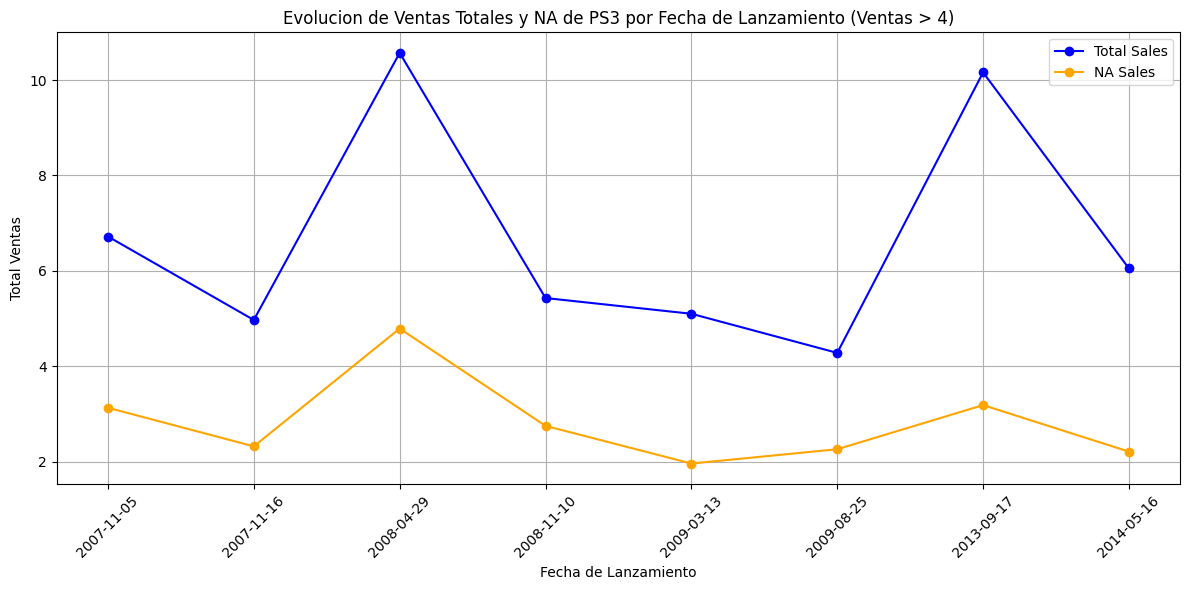

In [79]:
#Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo 
# de código.
#Profe, Tome el codigo base de tus clases y le pedi a chatgpt una mano ... ya se me acaba el tiempo!
# Quiero ver la EVOLUCION entre las ventas globales y las ventas en norte america segun lanzamiento. Para ver si encontramos alguna correlacion.
# reAgrupar por fecha de lanzamiento y consola
grouped = df.groupby(['release_date', 'console'])
resumen_aux = grouped.agg({
    'critic_score': 'mean',
    'total_sales': 'mean',
    'na_sales': 'mean',
    'jp_sales': 'mean',
    'other_sales': 'mean'
}).reset_index()

promedio_minimo_ventas = 4
# Filtrar para la consola PS3 y ventas mayores a promedio_minimo_ventas
aux = resumen_aux[(resumen_aux['console'] == 'PS3') & (resumen_aux['total_sales'] > promedio_minimo_ventas)]

# Asignar las columnas a variables
x_aux = aux['release_date']
target_total_sales = aux['total_sales']
target_na_sales = aux['na_sales']

# Verificar si hay datos antes de graficar
if not aux.empty:
    # Crear el gráfico de líneas para entender las ventas por fecha de lanzamiento
    plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura

    # Graficar total_sales
    plt.plot(x_aux, target_total_sales, marker='o', label='Total Sales', color='blue')

    # Graficar na_sales
    plt.plot(x_aux, target_na_sales, marker='o', label='NA Sales', color='orange')

    # Personalizar el gráfico
    plt.title(f"Evolucion de Ventas Totales y NA de PS3 por Fecha de Lanzamiento (Ventas > {promedio_minimo_ventas})")
    plt.xlabel("Fecha de Lanzamiento")
    plt.ylabel("Total Ventas")
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
    plt.tight_layout()  # Ajustar el diseño para que no se recorten las etiquetas
    plt.grid()  # Añadir una cuadrícula para mejor visualización
    plt.legend()  # Mostrar leyenda para identificar las líneas
    plt.show()
else:
    print("No hay registros de ventas mayores a {promedio_minimo_ventas} para PS3.")


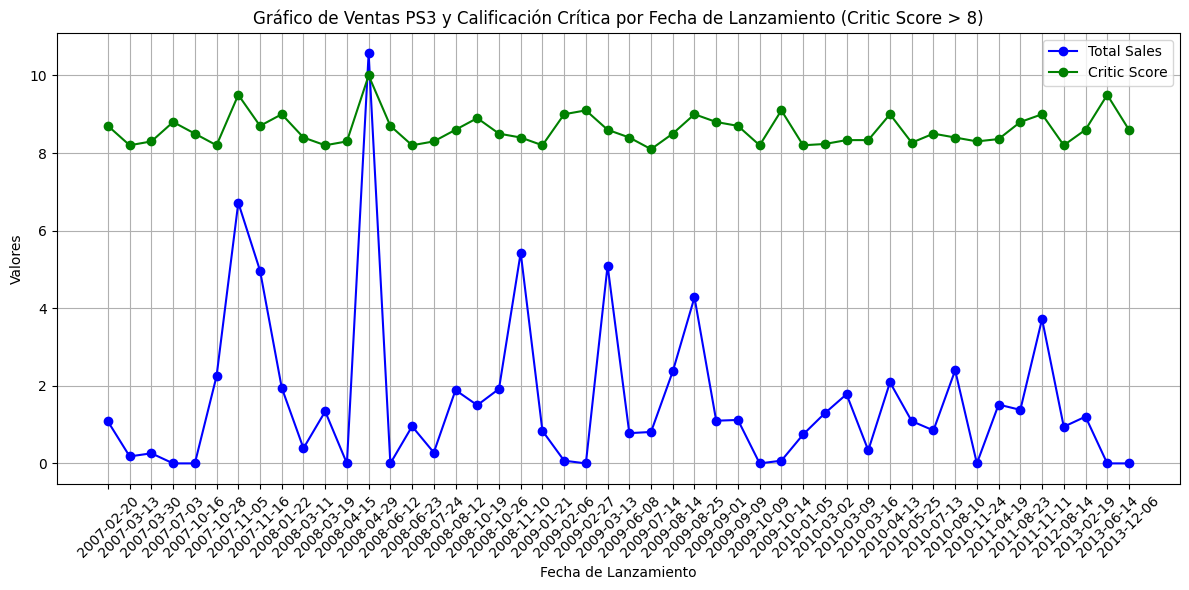

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Quiero ver la EVOLUCION entre las ventas globales y las valoraciones segun lanzamiento. Para ver si encontramos alguna otra correlacion.


# Filtrar para la consola PS3 y critic_score mayor a 8
aux = resumen_aux[(resumen_aux['console'] == 'PS3') & (resumen_aux['critic_score'] > 8)]

# Asignar las columnas a variables
x_aux = aux['release_date']
target_total_sales = aux['total_sales']
target_critic_score = aux['critic_score']

# Verificar si hay datos antes de graficar
if not aux.empty:
    # Crear el gráfico de líneas para entender las ventas por fecha de lanzamiento
    plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura

    # Graficar total_sales
    plt.plot(x_aux, target_total_sales, marker='o', label='Total Sales', color='blue')

    # Graficar critic_score
    plt.plot(x_aux, target_critic_score, marker='o', label='Critic Score', color='green')

    # Personalizar el gráfico
    plt.title("Gráfico de Ventas PS3 y Calificación Crítica por Fecha de Lanzamiento (Critic Score > 8)")
    plt.xlabel("Fecha de Lanzamiento")
    plt.ylabel("Valores")
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
    plt.tight_layout()  # Ajustar el diseño para que no se recorten las etiquetas
    plt.grid()  # Añadir una cuadrícula para mejor visualización
    plt.legend()  # Mostrar leyenda para identificar las líneas
    plt.show()
else:
    print("No hay registros de PS3 con un Critic Score mayor a 8.")


In [83]:
#Estadísticas descriptivas
target_critic_score.describe()

count    48.000000
mean      8.598472
std       0.403845
min       8.100000
25%       8.300000
50%       8.500000
75%       8.800000
max      10.000000
Name: critic_score, dtype: float64

In [ ]:
# Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.
# Análisis de correlación
# Predicción de ventas
#Es notable como el indice de aceptación del producto va de la mano con las ventas. Existiría un feedback importante de PS3 y sus clientes por eso se puede apreciar una 
# aparente causalidad.
# Si esta causalidad esta demostrada, PERO SERIA BUENO SABER LOS DATOS DESDE EL 2014 como le fue para corroborar la predicción de que al priorizar el feedback se mejora el producto
# para los clientes.
# Pero de no ser así se esperan bajas ventas.